## Predict Salary Hike

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
import statsmodels.formula.api as smf

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Understanding the Data

In [5]:
salary = pd.read_csv('Salary_Data.csv')

In [6]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
salary.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

<AxesSubplot:>

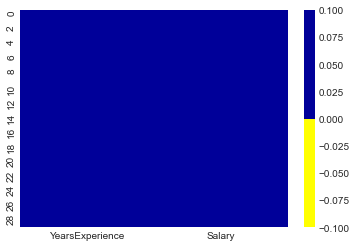

In [9]:
colors= ['#ffff00','#000099']
sns.heatmap(salary.isnull(),cmap=sns.color_palette(colors))

In [ ]:
# there is no missing values in the data

In [10]:
#duplicates 
salary[salary.duplicated()].shape

(0, 2)

In [ ]:
# no duplicates in data

Text(0.5, 1.0, 'Checking Outliers in Years Experience')

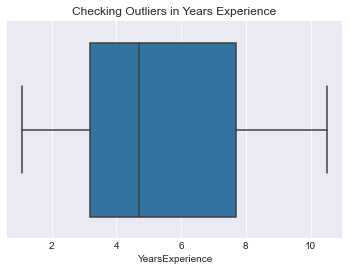

In [11]:
# finding the outliers 

sns.boxplot(salary['YearsExperience'])
plt.title('Checking Outliers in Years Experience')


Text(0.5, 1.0, 'Checking Outliers in Salary')

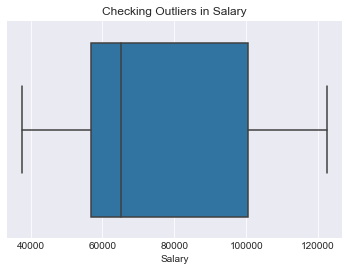

In [12]:
# finding the outliers 

sns.boxplot(salary['Salary'])
plt.title('Checking Outliers in Salary')

In [ ]:
# no outliers in data

### Step 1: Understanding the Linearity 

Text(0.5, 1.0, 'Predicting Salary Hike')

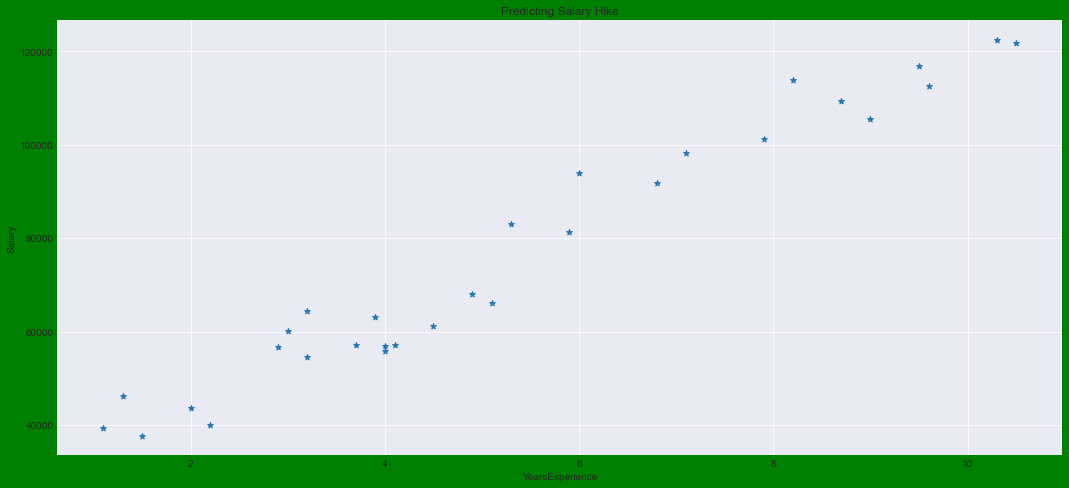

In [13]:
# Scatter plot

plt.figure(figsize=(18,8),facecolor='g')
plt.scatter(salary['YearsExperience'],salary['Salary'],marker = '*')

plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Predicting Salary Hike')

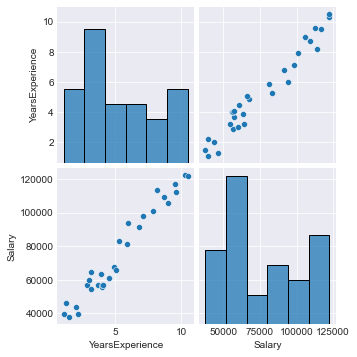

In [14]:
sns.pairplot(salary)

In [15]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

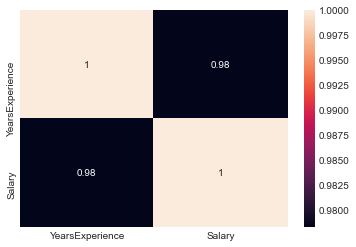

In [16]:
sns.heatmap(salary.corr(),annot=True)

In [ ]:
# There is strong +ve corelation  r= 0.978

### Step 2 : Creating the Linear Model & Checking Fitness

In [17]:
hike_model = smf.ols('Salary ~ YearsExperience',data=salary).fit()

In [18]:
hike_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           1.14e-20
Time:                        21:36:33   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# since R squared Score is- 0.9569 - model is good 

In [19]:
pred = hike_model.predict(salary['YearsExperience'])

Text(0.5, 1.0, 'Predicting Salary Hike')

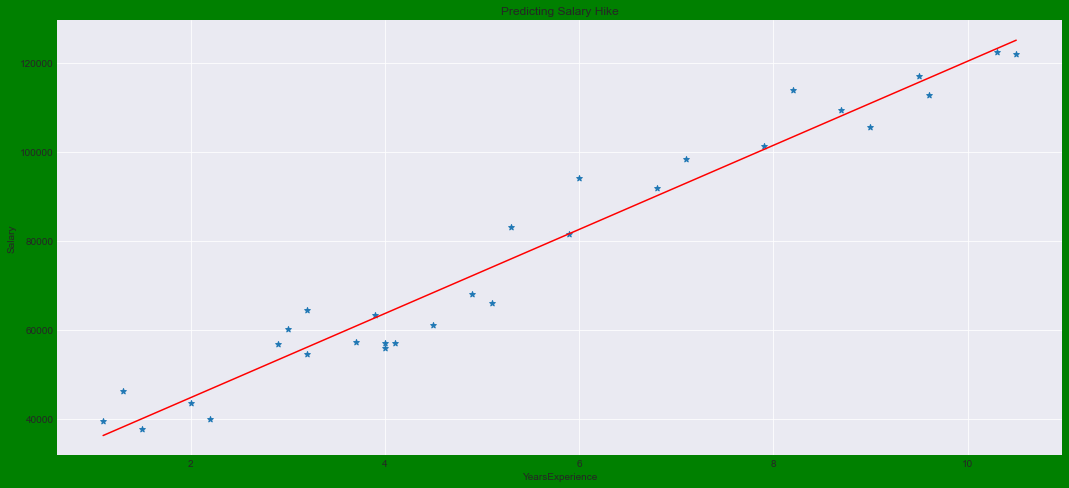

In [20]:
# Scatter plot with regression line

plt.figure(figsize=(18,8),facecolor='g')
plt.scatter(salary['YearsExperience'],salary['Salary'],marker = '*')

plt.plot(salary['YearsExperience'],pred,color='r')# regression line

plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Predicting Salary Hike')

Text(0.5, 1.0, 'Predicting Salary Hike')

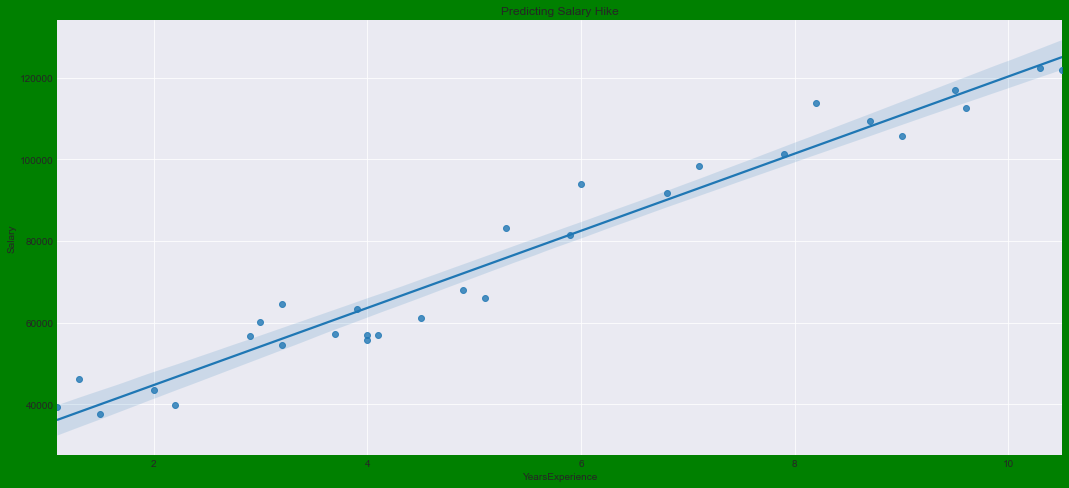

In [21]:
plt.figure(figsize=(18,8),facecolor='g')
sns.regplot(salary['YearsExperience'],salary['Salary'],fit_reg=True)

plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Predicting Salary Hike')